In [1]:
# Import libraries
import os
import magpy as mp
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import diffxpy.api as de
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

expt_path = "/proj/magness/"
cds010_path = "/proj/magness/CDS010_hashtag"
cds014_path = "/proj/magness/CDS014_hashtag"
cds015_path = "/proj/magness/CDS015_hashtag"
combined_path = "/proj/magness/CDS010-014-015_combined"

# sc.set_figure_params(dpi_save = 300, dpi = 200, format = 'svg')
figdir = combined_path+'/figures/computational_supp_figs/'
if not os.path.exists(figdir): os.makedirs(figdir)
sc.settings.figdir = figdir

plt.rcParams ['figure.facecolor'] = 'white'

contrast_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff','#ccccff',
                    '#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e','#adff2f','#4169e1',
                    '#ffa07a','#2f4f4f','#7f007f','#6e6e6e','#ff00ff']

SI_palette = ['#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e','#adff2f','#4169e1',
              '#ffa07a','#2f4f4f','#7f007f','#6e6e6e','#ff00ff']
Colon_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff','#ccccff']

region_palette = ['#7f007f','#FF5700','#3cb371','#EF4344','#4344EF','#EDEC2C']

paneth_palette = ['#4169e1','#7f007f']
goblet_palette = ['#7f007f']
leiden_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff','#ccccff',
                  '#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e','#adff2f','#ffa07a',
                  '#7f007f','#ff00ff']
CSI_leiden_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff',
                      '#ccccff','#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e',
                      '#adff2f','#ffa07a','#2f4f4f','#7f007f','#6e6e6e','#ff00ff']

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



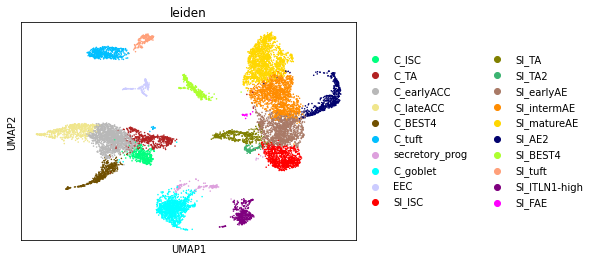

['SI_earlyAE', 'SI_AE2', 'SI_tuft', 'C_earlyACC', 'C_goblet', 'SI_matureAE', 'C_BEST4', 'SI_intermAE', 'C_lateACC', 'SI_ITLN1-high', 'C_EEC', 'C_tuft', 'C_ISC', 'SI_ISC', 'SI_BEST4', 'SI_TA', 'C_TA', 'SI_secretory_prog', 'C_secretory_prog', 'SI_EEC', 'SI_TA2', 'SI_FAE']


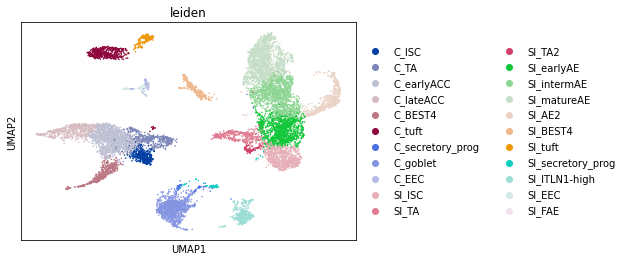

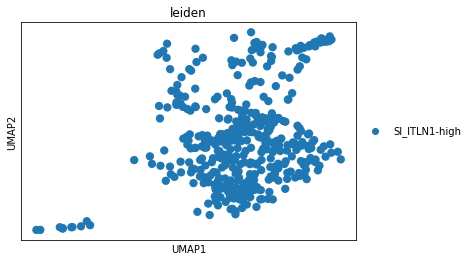

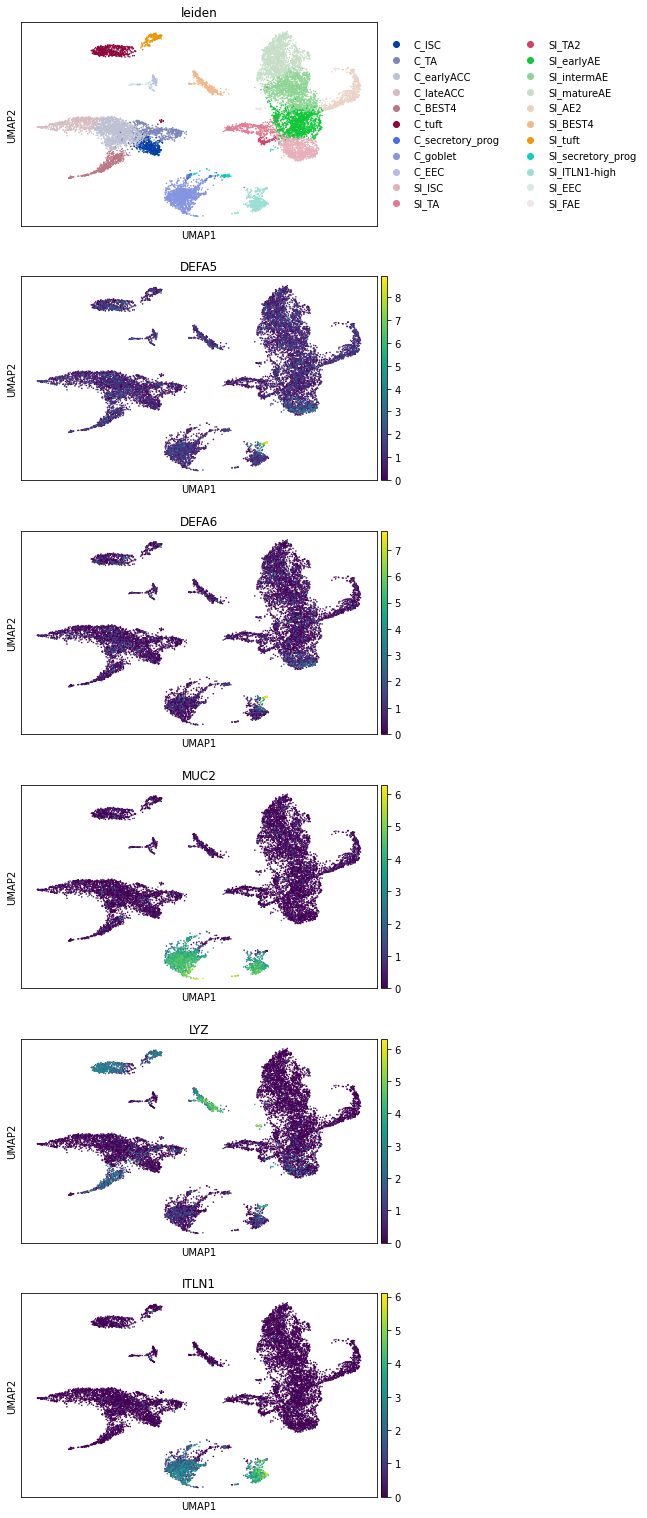

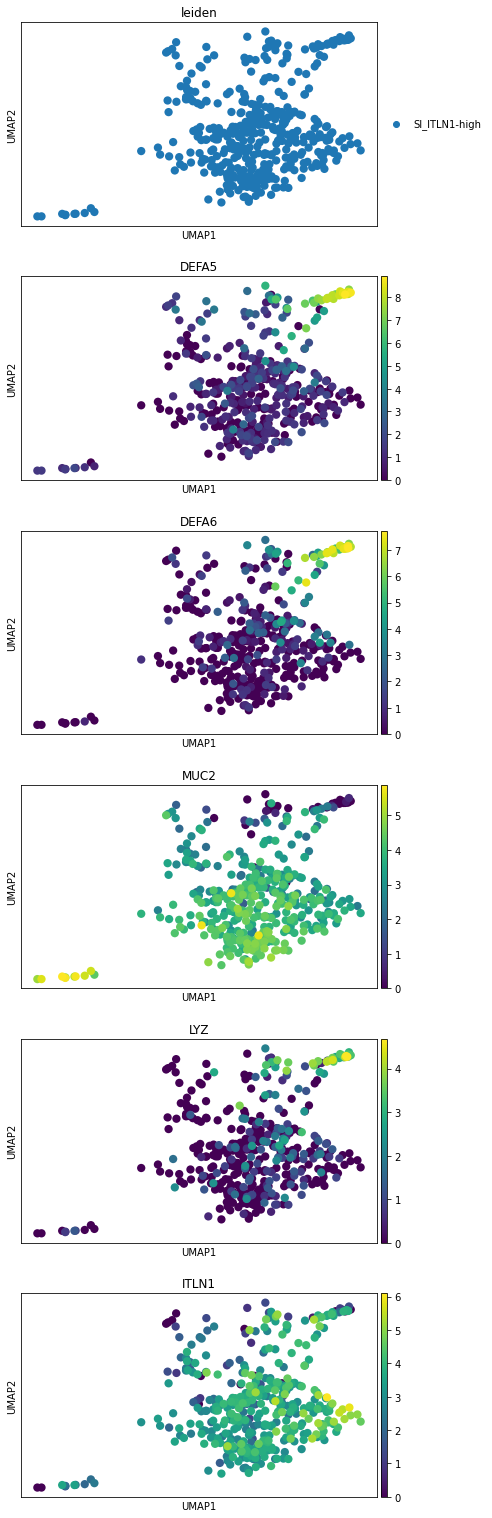

2023-03-17 13:44:53,613 - harmonypy - INFO - Iteration 1 of 20
2023-03-17 13:44:53,668 - harmonypy - INFO - Iteration 2 of 20


Running harmonypy integration of principal components...


2023-03-17 13:44:53,720 - harmonypy - INFO - Iteration 3 of 20
2023-03-17 13:44:53,768 - harmonypy - INFO - Iteration 4 of 20
2023-03-17 13:44:53,786 - harmonypy - INFO - Iteration 5 of 20
2023-03-17 13:44:53,802 - harmonypy - INFO - Converged after 5 iterations


Computing neighborhood graph...
Calculating Leiden clusters...


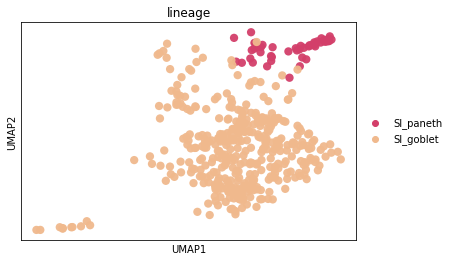

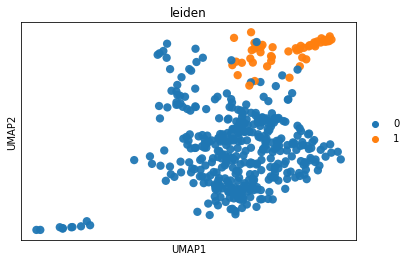

Clustering complete.

Highly variable genes: 2777
SI_goblet    388
SI_paneth     49
Name: lineage, dtype: int64
0    384
1     53
Name: leiden, dtype: int64
['SI_earlyAE', 'SI_AE2', 'SI_tuft', 'C_earlyACC', 'C_goblet', 'SI_matureAE', 'C_BEST4', 'SI_intermAE', 'C_lateACC', 'SI_goblet', 'C_EEC', 'C_tuft', 'C_ISC', 'SI_ISC', 'SI_BEST4', 'SI_TA', 'C_TA', 'SI_secretory_prog', 'C_secretory_prog', 'SI_EEC', 'SI_TA2', 'SI_paneth', 'SI_FAE']


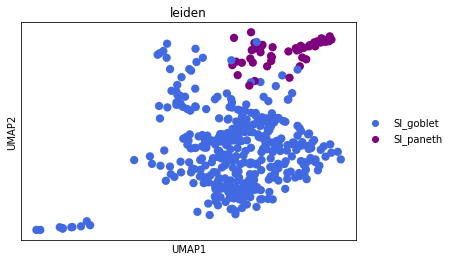

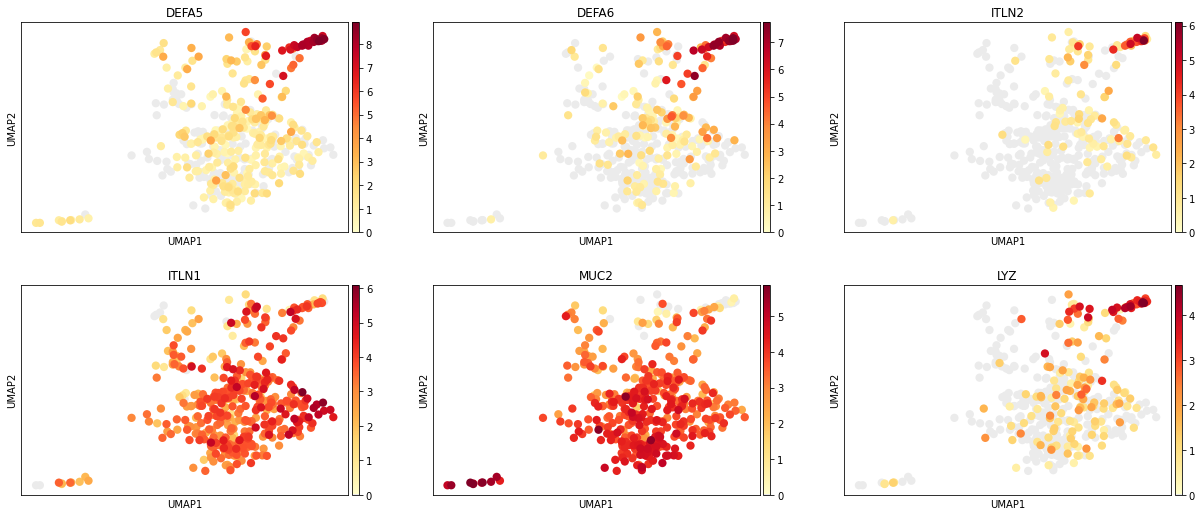

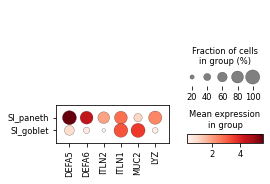

In [2]:
## - Dividing EECS into SI and Colon and Subclustering out Paneth cells from goblet cellsa
expt_path = "/proj/magness/CDS010-014-015_combined"
adata = mp.load(expt_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

### reordering and renaming lineages for UMAP
lineage_map = {
    'SI_matureAE':'SI_matureAE',
    'C_earlyCC':'C_earlyACC',
    'SI_intermAE':'SI_intermAE',
    'SI_earlyAE':'SI_earlyAE',
    'C_goblet':'C_goblet',
    'SI_ISC':'SI_ISC',
    'SI_6-?':'SI_AE2',
    'C_lateCC':'C_lateACC',
    'C_tuft':'C_tuft',
    'C_TA':'C_TA',
    'C_BEST4':'C_BEST4',
    'SI_secretory':'SI_ITLN1-high',
    'SI_TA':'SI_TA',
    'C_ISC':'C_ISC',
    'SI_BEST4':'SI_BEST4',
    'SI_tuft':'SI_tuft',
    'EEC':'EEC',
    'secretory_prog':'secretory_prog',
    'SI_TA2':'SI_TA2',
    'SI_FAE':'SI_FAE'
}

adata.obs['leiden'] = adata.obs['leiden'].map(lineage_map)

leiden_order1 = ['C_ISC','C_TA','C_earlyACC','C_lateACC','C_BEST4','C_tuft','secretory_prog','C_goblet',
                 'EEC','SI_ISC','SI_TA','SI_TA2','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2',
                 'SI_BEST4', 'SI_tuft','SI_ITLN1-high','SI_FAE']


adata.obs.leiden.cat.reorder_categories(leiden_order1, inplace=True)

##Figure 3A - Initial Leiden Clustering
sc.pl.umap(adata, color = ['leiden'], ncols = 1, palette = leiden_palette)

### Supp fig 3B SPLIT .OBS.LINEAGE EEC AND GOBLET_PROG INTO SI AND COLON ###
colon_GPs = (adata.obs['leiden']=='secretory_prog') & (adata.obs['organ']=='Colon' )
SI_GPs = (adata.obs['leiden']=='secretory_prog') & (adata.obs['organ']=='SI' )

adata.obs['leiden'].cat.add_categories(new_categories=['C_secretory_prog','SI_secretory_prog'],inplace=True)
adata.obs['leiden'] = adata.obs['leiden'].mask(colon_GPs,other='C_secretory_prog')
adata.obs['leiden'] = adata.obs['leiden'].mask(SI_GPs,other='SI_secretory_prog')
adata.obs['leiden'].cat.remove_categories(removals='secretory_prog',inplace=True)

colon_EECs = (adata.obs['leiden']=='EEC') & (adata.obs['organ']=='Colon' )
SI_EECs = (adata.obs['leiden']=='EEC') & (adata.obs['organ']=='SI' )

adata.obs['leiden'].cat.add_categories(new_categories=['C_EEC','SI_EEC'],inplace=True)
adata.obs['leiden'] = adata.obs['leiden'].mask(colon_EECs,other='C_EEC')
adata.obs['leiden'] = adata.obs['leiden'].mask(SI_EECs,other='SI_EEC')
adata.obs['leiden'].cat.remove_categories(removals='EEC',inplace=True)

print([a for a in adata.obs.leiden.unique()]) 

leiden_order2 = ['C_ISC','C_TA','C_earlyACC','C_lateACC','C_BEST4','C_tuft','C_secretory_prog','C_goblet',
                 'C_EEC','SI_ISC','SI_TA','SI_TA2','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2',
                 'SI_BEST4','SI_tuft','SI_secretory_prog','SI_ITLN1-high','SI_EEC','SI_FAE']


adata.obs.leiden.cat.reorder_categories(leiden_order2, inplace=True)
subset = adata[adata.obs['leiden']=='SI_ITLN1-high'].copy()


sc.pl.umap(adata, color = 'leiden', ncols =1)
sc.pl.umap(subset, color = 'leiden', ncols =1)


## Fig 3C - ITLN1 marks SI goblet cells
sc.pl.umap(adata, color = ['leiden','DEFA5','DEFA6','MUC2','LYZ','ITLN1'], ncols = 1)
sc.pl.umap(subset, color = ['leiden','DEFA5','DEFA6','MUC2','LYZ','ITLN1'], ncols = 1)

##Subsetting SI_goblet cells and subclustering out Paneth cells
leiden_res = leiden_resolution = 0.15
num_neighbors = 15
num_pcs = 40
kwargs = {'max_iter_harmony':20}



subset = mp.pipeline.recluster(subset, save=False, expt_path=combined_path, write_file=None, use_raw = False,
                                recalc_pca=False, reembed=False, recalc_hvg = False, 
                                harmonize=True,  annotate_cell_cycle=False, 
                                regress_cell_cycle=False, num_pcs=num_pcs, num_neighbors=num_neighbors,
                                leiden_res=leiden_res, rescale_data = False, **kwargs)

##Check num highly variable genes and number of paneth cells clustered
print("Highly variable genes: %d"%sum(subset.var.highly_variable))

# sc.pl.umap(subset, color = ['leiden','DEFA5','DEFA6','MUC2','LYZ','ITLN1'], ncols = 1)

print(subset.obs.lineage.value_counts())
print(subset.obs.leiden.value_counts())

##Masking paneth cells from subset and renaming goblets and paneths in main dataset
goblet_subset = subset[subset.obs['leiden']=='0']
paneth_subset = subset[subset.obs['leiden']=='1']

subset.obs.leiden.cat.add_categories(['SI_goblet','SI_paneth'], inplace = True)
adata.obs.leiden.cat.add_categories(['SI_goblet','SI_paneth'], inplace = True)

subset.obs.leiden.cat.remove_categories(['0','1'], inplace = True)
adata.obs.leiden.cat.remove_categories('SI_ITLN1-high', inplace = True)

subset.obs['leiden'].mask(subset.obs_names.isin(goblet_subset.obs_names.tolist()), 'SI_goblet', inplace = True)
subset.obs['leiden'].mask(subset.obs_names.isin(paneth_subset.obs_names.tolist()), 'SI_paneth', inplace = True)

adata.obs['leiden'].mask(adata.obs_names.isin(goblet_subset.obs_names.tolist()), 'SI_goblet', inplace = True)
adata.obs['leiden'].mask(adata.obs_names.isin(paneth_subset.obs_names.tolist()), 'SI_paneth', inplace = True)

# sc.pl.umap(adata, color = 'leiden')

print([a for a in adata.obs.leiden.unique()]) 

lineage_order = ['C_ISC','C_TA','C_earlyACC','C_lateACC','C_BEST4','C_tuft','C_secretory_prog','C_goblet',
                 'C_EEC',
                 'SI_ISC','SI_TA','SI_TA2','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2','SI_BEST4',
                 'SI_paneth','SI_tuft','SI_secretory_prog','SI_goblet','SI_EEC','SI_FAE']

adata.obs.leiden.cat.reorder_categories(lineage_order, inplace=True)

###Fig 3D,E,F - Show subclustering paneth cells, marker genes, dotplots
sc.pl.umap(subset, color = 'leiden', palette = paneth_palette)#, save = '_paneth_subset_leiden')
sc.pl.umap(subset, color = ['DEFA5','DEFA6','ITLN2','ITLN1','MUC2','LYZ'], cmap = mp.reds, ncols = 3)#, save = '_paneth_markers_subset')
sc.pl.dotplot(subset, ['DEFA5','DEFA6','ITLN2','ITLN1','MUC2','LYZ'], groupby = 'lineage')#, save = 'subset_marker_genes_by_reclustered_lineage')